## Instalación de librerias necesarias

In [ ]:
%pip install xgboost
%pip install skforecast
%pip install sqlalchemy
%pip install PyMySQL

Python interpreter will be restarted.
Collecting xgboost
 Downloading xgboost-1.6.1-py3-none-manylinux2014_x86_64.whl (192.9 MB)
Requirement already satisfied: numpy in /databricks/python3/lib/python3.8/site-packages (from xgboost) (1.20.1)
Requirement already satisfied: scipy in /databricks/python3/lib/python3.8/site-packages (from xgboost) (1.6.2)
Installing collected packages: xgboost
Successfully installed xgboost-1.6.1
Python interpreter will be restarted.
Python interpreter will be restarted.
Collecting skforecast
 Downloading skforecast-0.4.3-py2.py3-none-any.whl (87 kB)
Requirement already satisfied: statsmodels<=0.13,>=0.12 in /databricks/python3/lib/python3.8/site-packages (from skforecast) (0.12.2)
Collecting scikit-learn>=1.0
 Downloading scikit_learn-1.1.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (31.2 MB)
Requirement already satisfied: numpy<=1.22,>=1.20 in /databricks/python3/lib/python3.8/site-packages (from skforecast) (1.20.1)
Collecting tqdm<=4.62,>=4.57.0
 Downloading tqdm-4.62.0-py2.py3-none-any.whl (76 kB)
Requirement already satisfied: pandas<=1.4,>=1.2 in /databricks/python3/lib/python3.8/site-packages (from skforecast) (1.2.4)
Requirement already satisfied: pytz>=2017.3 in /databricks/python3/lib/python3.8/site-packages (from pandas<=1.4,>=1.2->skforecast) (2020.5)
Requirement already satisfied: python-dateutil>=2.7.3 in /databricks/python3/lib/python3.8/site-packages (from pandas<=1.4,>=1.2->skforecast) (2.8.1)
Requirement already satisfied: six>=1.5 in /databricks/python3/lib/python3.8/site-packages (from python-dateutil>=2.7.3->pandas<=1.4,>=1.2->skforecast) (1.15.0)
Requirement already satisfied: scipy>=1.3.2 in /databricks/python3/lib/python3.8/site-packages (from scikit-learn>=1.0->skforecast) (1.6.2)
Requirement already satisfied: joblib>=1.0.0 in /databricks/python3/lib/python3.8/site-packages (from scikit-learn>=1.0->skforecast) (1.0.1)
Requirement already satisfied: threadpoolctl>=2.0.0 in /databricks/python3/lib/python3.8/site-packages (from scikit-learn>=1.0->skforecast) (2.1.0)
Requirement already satisfied: patsy>=0.5 in /databricks/python3/lib/python3.8/site-packages (from statsmodels<=0.13,>=0.12->skforecast) (0.5.1)
Installing collected packages: tqdm, scikit-learn, skforecast
 Attempting uninstall: scikit-learn
 Found existing installation: scikit-learn 0.24.1
 Not uninstalling scikit-learn at /databricks/python3/lib/python3.8/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-649d4e08-42f4-450e-901a-b8e1edf85bc0
 Can't uninstall 'scikit-learn'. No files were found to uninstall.
Successfully installed scikit-learn-1.1.1 skforecast-0.4.3 tqdm-4.62.0
Python interpreter will be restarted.
Python interpreter will be restarted.
Collecting sqlalchemy
 Downloading SQLAlchemy-1.4.39-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.6 MB)
Collecting greenlet!=0.4.17
 Downloading greenlet-1.1.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (156 kB)
Installing collected packages: greenlet, sqlalchemy
Successfully installed greenlet-1.1.2 sqlalchemy-1.4.39
Python interpreter will be restarted.
Python interpreter will be restarted.
Collecting PyMySQL
 Downloading PyMySQL-1.0.2-py3-none-any.whl (43 kB)
Installing collected packages: PyMySQL
Successfully installed PyMySQL-1.0.2
Python interpreter will be restarted.

## Importación de librerías necesarias

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from skforecast.ForecasterAutoreg import ForecasterAutoreg
import warnings
from sqlalchemy import create_engine

py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0

In [ ]:
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5

py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0

In [ ]:
warnings.filterwarnings('ignore')

py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0

## Creación del modelo con XGBRegressor y SKforecast para series de tiempo

In [ ]:

# Función para corregir valores outliers:
def corregir_outliers(df,columna):
    df[(np.abs(df[columna]-df[columna].mean()) > (3*df[columna].std()))] = int(df[columna].mean())
    return df

# Machine Learning, Entrenamiento y predicción del futuro:
def magic_forecasting(categoria,meses_futuro):
    datos_ML = datos_agrupados[datos_agrupados['product_category_name'] == categoria]
    datos_ML = datos_ML.drop(columns=['product_category_name'])
    datos_ML = datos_ML.set_index('fecha')
    #Al agregar esto, completamos los valores faltantes con 0:
    datos_ML = datos_ML.asfreq('D',fill_value = 0)
    datos_ML = corregir_outliers(datos_ML, 'ventas')
    datos_ML = datos_ML.sort_index()
    datos_ML.head()
    
    # Separación datos train-test
    # ==============================================================================
    steps = int(datos_ML.shape[0]*0.3) #30% para test
    datos_train = datos_ML[:-steps]
    datos_test  = datos_ML[-steps:]
    #print(f"Fechas train : {datos_train.index.min()} --- {datos_train.index.max()}  (n={len(datos_train)})")
    #print(f"Fechas test  : {datos_test.index.min()} --- {datos_test.index.max()}  (n={len(datos_test)})")
    
    #fig, ax = plt.subplots(figsize=(9, 4))
    #datos_train['ventas'].plot(ax=ax, label='train')
    #datos_test['ventas'].plot(ax=ax, label='test')
    #ax.legend()
    
    # Crear y entrenar forecaster
    # ==============================================================================
    regressor = XGBRegressor(random_state=123,learning_rate=0.1,max_depth=3, n_estimators=100)
    forecaster = ForecasterAutoreg(
                    regressor = regressor,
                    lags      = 200) #200 días hacia atras, serán usados para predecir
    forecaster.fit(y=datos_train['ventas'])
    
    # Predicciones
    # ==============================================================================
    steps = int(datos_ML.shape[0]*0.3)
    predicciones = forecaster.predict(steps=steps)
    #predicciones.head(5)
    
    # Error test
    # ==============================================================================
    # error_mse = mean_squared_error(
    #                 y_true = datos_test['ventas'],
    #                 y_pred = predicciones)
    # print(f"Error de test (mse): {error_mse}")
    
    # Predicciones en el futuro
    # ==============================================================================
    #meses_futuro = 6
    steps = datos_test.shape[0] + meses_futuro * 30
    predicciones_futuro = forecaster.predict(steps=steps)
    predicciones_futuro = predicciones_futuro[predicciones_futuro.index>predicciones.index[-1]]
    #predicciones_futuro.head(10)
    # Gráfico
    # ==============================================================================
    fig, ax = plt.subplots(figsize=(12, 6))
    datos_train['ventas'].plot(ax=ax, label='Datos Train')
    datos_test['ventas'].plot(ax=ax, label='Datos Test')
    predicciones.plot(ax=ax, label='Predic. Test', color='Green')
    predicciones_futuro.plot(ax=ax, label='Futuro', color='Purple')
    plt.xlabel("Tiempo [días]")
    plt.ylabel("Ventas [unidades]")
    plt.title("Predicciones en categoria " + categoria)
    ax.legend(shadow=True, facecolor="Bisque", edgecolor="SandyBrown",title="Leyenda");
    
    necesidad_futura = int(sum(predicciones_futuro))
    print("En los próximos " + str(meses_futuro)
          + " meses, serán necesarios " + str(necesidad_futura) 
          + " productos de la cátegoria " + categoria)
    return necesidad_futura


py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0

## Conexión al servidor MySQL en RDS para crear las tablas para entrenar el modelo

In [ ]:
engine = create_engine(<access>)

#Tablas para ML:
orders = pd.read_sql_table('orders', engine)
order_items = pd.read_sql_table('order_items', engine)
products = pd.read_sql_table('products', engine)

#Hacemos un merge entre las ordenes, y los items de las ordenes:
union_1 = orders.merge(order_items, how='left', left_on = 'order_id', right_on = 'order_id')

#Con la tabla anterior, hacemos un merge con products, para conocer el category_name:
union_2 = union_1.merge(products, how='left', left_on = 'product_id', right_on = 'product_id')

#Filtramos solo las ventas completadas, como delivered:
tabla_final = union_2[union_2['order_status'] == 'delivered']

#Nos quedamos solamente con las columnas de nuestro interes:
datos = tabla_final[['purchase_timestamp','product_category_name']]
datos = datos.rename(columns={'purchase_timestamp': 'fecha'})

py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p

## Preparación de datos para el modelo y análisis exploratorio de datos

In [ ]:
#Buscamos años y meses:
datos['Year'] = datos['fecha'].dt.year 
datos['Month'] = datos['fecha'].dt.month 
datos['Day'] = datos['fecha'].dt.day 

datos_agrupados = datos.groupby(by=['Year','Month','Day','product_category_name']).count()
datos_agrupados = datos_agrupados.rename(columns={'fecha': 'ventas'})
datos_agrupados = datos_agrupados.reset_index()

#Vemos que categorias conviene predecir:
de_interes = datos_agrupados.groupby(by=['product_category_name']).sum()
de_interes = de_interes['ventas']
de_interes = de_interes.sort_values(ascending=False)
de_interes.head(5)
# product_category_name
# cama_mesa_banho           9179
# beleza_saude              8615
# esporte_lazer             7498
# informatica_acessorios    6508
# moveis_decoracao          6194
####################################################
#Volvemos a incorporar la fecha en modo datatime:
datos_agrupados['Year'] = datos_agrupados['Year'].astype(str)
datos_agrupados['Month'] = datos_agrupados['Month'].astype(str)
datos_agrupados['Day'] = datos_agrupados['Day'].astype(str)
datos_agrupados['fecha'] = pd.to_datetime(datos_agrupados['Year'] + '/' + datos_agrupados['Month'] + '/' + datos_agrupados['Day'], format='%Y/%m/%d')
datos_agrupados = datos_agrupados.drop(columns=['Year','Month','Day'])

py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0

## Generación de predicción

py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p

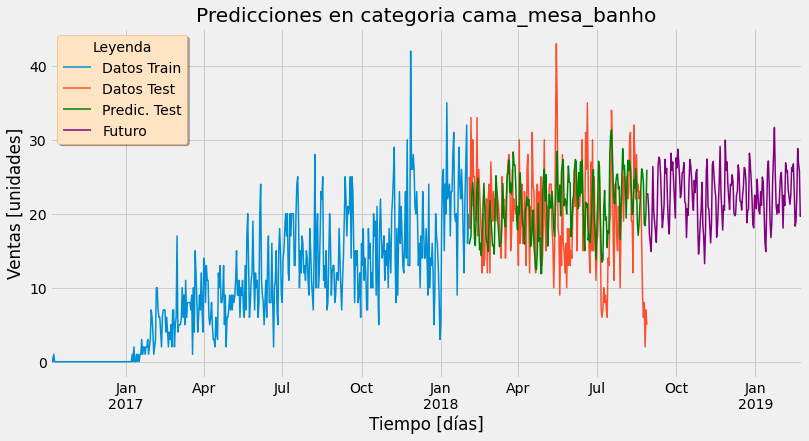

py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0
py4j.java_gateway INFO Received command c on object id p0

In [ ]:
#Predecimos de a una categoria:
categoria = 'cama_mesa_banho'
meses_futuro = 6
necesidad_futura = magic_forecasting(categoria, meses_futuro)
